In [1]:
import sys
sys.path.append("../../src")
import os
import numpy as np
import pickle
# from example_lorenz import get_lorenz_data, generate_lorenz_data
from autoencoder import full_network
from training import create_feed_dictionary
from sindy_utils import sindy_simulate
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

/home/e/esigalas/anaconda3/envs/auto-sindy/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/e/esigalas/anaconda3/envs/auto-sindy/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/e/esigalas/anaconda3/envs/auto-sindy/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/e/esigalas/anaco

In [2]:
data_path = os.getcwd() + '/'
# This model was able to capture some rotationality
# save_name = 'bump_attractor_order3_epochs5012020_10_05_05_39_59_674563' 
# save_name = 'bump_attractor_order3_relu_epochs5012020_10_07_05_10_50_134011' 
# save_name = 'bump_attractor_order3_relu_epochs5012020_10_07_05_30_08_214233' 

##save_name = 'bump_attractor_order3_relu_epochs5012020_10_06_08_11_27_011726'

# save_name = 'bump_attractor_order3_relu_epochs5012020_10_06_06_10_09_873559'


# save_name = 'new_bump_attractor_order3_relu_epochs5012020_10_12_06_45_21_832632' 
# save_name = 'new_bump_attractor_order3_relu_epochs5012020_10_12_07_08_11_828321'


# 3D models
# save_name = 'new_bump_attractor_order3_relu_epochs6012020_10_16_08_32_27_612753' 
# save_name = 'new_bump_attractor_order3_relu_epochs8012020_10_16_09_05_01_587816' 
# save_name = 'new_bump_attractor_order3_relu_epochs10012020_10_16_09_27_30_011404' 


# save_name = 'new_bump_attractor_order3_relu_epochs25012020_10_19_07_34_40_736695' 
# no thresholding
# save_name = 'new_bump_attractor_order3_relu_epochs25012020_10_19_07_36_32_060035' 

# 3D
# save_name = 'new_bump_attractor_order3_relu_epochs14002020_10_20_05_40_57_598301' 
# save_name = 'new_bump_attractor_order3_relu_epochs14002020_10_20_05_40_29_656438' 

# 2D
# save_name = 'new_bump_attractor_order3_relu_epochs14002020_10_20_07_19_25_576329' 
# 2000 epochs
# save_name = 'new_bump_attractor_order3_relu_epochs20002020_10_20_07_54_51_454852' 
# save_name = 'new_bump_attractor_order3_relu_epochs20002020_10_20_07_56_51_780672'
# save_name = 'new_bump_attractor_order3_relu_epochs30002020_10_20_08_50_24_548109' 

# save_name = 'new_bump_attractor_order3_relu_epochs40002020_10_20_08_51_34_511527' 
# save_name = 'new_bump_attractor_order3_relu_epochs30002020_10_20_10_13_33_578700' 

# save_name = 'new_bump_attractor_order3_relu_epochs50002020_10_21_05_40_52_675047'


#### save_name = 'new_bump_attractor_order3_relu_epochs50002020_10_21_09_19_01_404456'

### successful 2D models!
# save_name = 'new_bump_attractor_order3_relu_epochs50002020_10_21_09_26_59_953510'

# missed some trajectories in the full run
# save_name = 'new_bump_attractor_order3_relu_epochs50002020_10_22_03_34_53_790091'

# good with big batch
# save_name = 'new_bump_attractor_order3_relu_epochs50002020_10_22_08_47_27_007115'
# save_name = 'new_bump_attractor_order3_relu_epochs50002020_10_22_10_06_44_316369'
# save_name = 'new_bump_attractor_order3_relu_epochs50002020_10_23_07_54_27_161791'
# with 8 coeffs!
# save_name = 'new_bump_attractor_order3_relu_epochs50002020_10_23_08_36_02_913752'
# save_name = 'new_bump_attractor_order5_relu_epochs50002020_10_26_05_52_05_924335'
# 6 coeffs clean cyclical trajectories
# save_name = 'new_bump_attractor_order5_relu_epochs50002020_10_26_05_46_43_740175' 5000 epochs
# 5001 epochs
# save_name = 'new_bump_attractor_order5_relu_epochs50012020_10_26_09_20_02_712949'
# 5001 epochs with refinemnet
# save_name = 'new_bump_attractor_order5_relu_epochs50012020_10_26_12_00_16_006896'


#save_name = 'new_bump_attractor_order3_relu_epochs50002020_10_22_08_52_09_960584'
# save_name = 'new_bump_attractor_order5_relu_epochs50012020_10_26_12_00_30_418013'


# 3D
# works but not clearer than 2D
# save_name = 'new_bump_attractor_order3_relu_epochs50002020_10_22_03_45_03_456724'
# save_name = 'new_bump_attractor_order3_relu_epochs50002020_10_22_08_49_48_537657'
# save_name = 'new_bump_attractor_order3_relu_epochs50002020_10_22_10_07_51_003974'
# save_name = 'new_bump_attractor_order3_relu_epochs50002020_10_22_08_52_15_876898'
# save_name = 'new_bump_attractor_order3_relu_epochs50002020_10_23_07_54_31_171990'
# kind of more clear one but with many coeffs
# save_name = 'new_bump_attractor_order5_relu_epochs50002020_10_26_05_33_10_782745'
# save_name = 'new_bump_attractor_order5_relu_epochs50002020_10_26_06_39_22_376616'

# save_name = 'new_bump_attractor_order5_relu_epochs50002020_10_26_08_27_20_022724'
# save_name = 'new_bump_attractor_order5_relu_epochs50012020_10_26_09_56_26_248029'


save_name = 'models/bump_attractor_order5_relu_epochs50012020_10_27_04_55_32_697295'

params = pickle.load(open(data_path + save_name + '_params.pkl', 'rb'))
params['save_name'] = data_path + save_name

autoencoder_network = full_network(params)
learning_rate = tf.placeholder(tf.float32, name='learning_rate')
saver = tf.train.Saver(var_list=tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES))

tensorflow_run_tuple = ()
for key in autoencoder_network.keys():
    tensorflow_run_tuple += (autoencoder_network[key],)



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use `tf.cast` instead.


## Single trajectory plots

In [3]:
print(params)

{'input_dim': 120, 'latent_dim': 2, 'model_order': 1, 'poly_order': 5, 'include_sine': True, 'library_dim': 23, 'sequential_thresholding': True, 'coefficient_threshold': 0.6, 'threshold_frequency': 500, 'coefficient_mask': array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False,  True],
       [ True, False],
       [False, False],
       [False, False],
       [False,  True],
       [ True, False],
       [False, False],
       [ True, False],
       [False, False],
       [False, False],
       [False,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]]), 'coefficient_initialization': 'constant', 'loss_weight_decoder': 1, 'loss_weight_sindy_z': 0.9, 'loss_weight_sindy_x': 0.9, 'loss_weight_sindy_regularization': 0.0001, 'activation': 'relu', 'widths': [64, 32], 'epoch_size': 53760, 'batch_size': 1

In [4]:
# test_data = {}
# test_data['x'] = np.load("flat_model_test_data_target.npy")
# test_data['dx'] = np.load("flat_model_test_data_derivatives_target.npy")
# train_data = {}
# train_data['x'] = np.load("flat_model_train_data_target.npy")
# train_data['dx'] = np.load("flat_model_train_data_derivatives_target.npy")
test_data = {}
test_data['x'] = np.load("data/new_flat_model_test_data_target.npy")
test_data['dx'] = np.load("data/new_flat_model_test_data_derivatives_target.npy")
train_data = {}
train_data['x'] = np.load("data/new_flat_model_train_data_target.npy")
train_data['dx'] = np.load("data/new_flat_model_train_data_derivatives_target.npy")

test_data_labels = np.load("data/flat_test_data_target_labels.npy")
train_data_labels = np.load("data/flat_train_data_target_labels.npy")

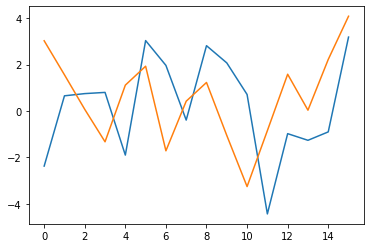

In [4]:
plt.plot(train_data['x'][:16,0])
plt.plot(train_data['dx'][:16,0])

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, data_path + save_name)
    train_dictionary = create_feed_dictionary(train_data, params)
    train_tf_results = sess.run(tensorflow_run_tuple, feed_dict=train_dictionary)

train_set_results = {}
for i,key in enumerate(autoencoder_network.keys()):
    train_set_results[key] = train_tf_results[i]

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /home/e/esigalas/workspace/SindyAutoencoders/examples/bump_attractor/models/bump_attractor_order5_relu_epochs50012020_10_27_04_55_32_697295


In [6]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, data_path + save_name)
    test_dictionary = create_feed_dictionary(test_data, params)
    test_tf_results = sess.run(tensorflow_run_tuple, feed_dict=test_dictionary)

test_set_results = {}
for i,key in enumerate(autoencoder_network.keys()):
    test_set_results[key] = test_tf_results[i]

INFO:tensorflow:Restoring parameters from /home/e/esigalas/workspace/SindyAutoencoders/examples/bump_attractor/models/bump_attractor_order5_relu_epochs50012020_10_27_04_55_32_697295


In [7]:
np.min(train_set_results['sindy_coefficients'])

-9.171753

In [8]:
np.max(train_set_results['sindy_coefficients'])

3.3319244

In [9]:
train_set_results['sindy_coefficients']

array([[ 4.8423150e-05, -1.8006754e-04],
       [ 2.5646624e-04, -6.7619854e-05],
       [ 1.6064711e-04,  5.8167425e-06],
       [-4.6104753e-05, -1.1544122e-04],
       [ 3.2092707e-04,  1.9747675e-04],
       [-1.8087444e-04,  1.7385419e-04],
       [ 2.4102588e-05,  2.0234864e-04],
       [-9.8565884e-05,  1.4888754e+00],
       [-2.8488815e+00, -7.3242518e-06],
       [ 4.8220449e-05, -2.4035797e-04],
       [-1.6453495e-04, -9.3050403e-05],
       [-1.0201766e-05,  4.0041056e+00],
       [-1.1437780e+01,  3.3256752e-04],
       [-2.0653142e-04,  6.7500805e-05],
       [-5.6459913e+00,  2.5103908e-04],
       [ 2.4326473e-05,  1.3699874e-04],
       [ 1.9290554e-04,  1.3512432e-05],
       [ 5.5713550e-05,  3.0941563e+00],
       [ 9.8271019e-05,  6.2314939e-07],
       [-1.5562543e-04, -1.8012214e-04],
       [ 1.3798795e-05,  6.7155546e-05],
       [ 2.4023332e-04,  9.4780626e-06],
       [ 2.1047545e-04,  1.1236978e-04]], dtype=float32)

In [10]:
train_set_results['z'].shape[0]

53760

# Train dataset target trajectories 2D

In [9]:
color_map = {8:'b', 1:'g', 2:'r', 3:'c', 4:'m', 5:'y', 6:'k', 7:'w'}


0


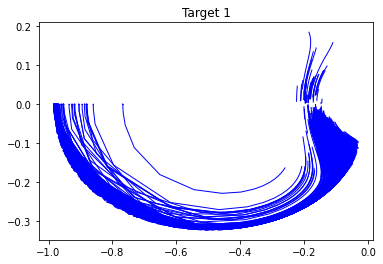

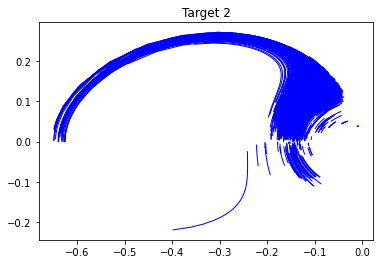

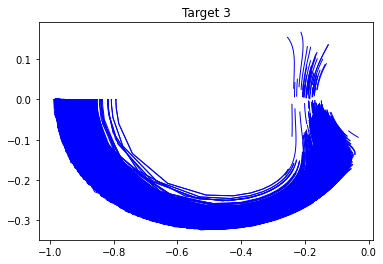

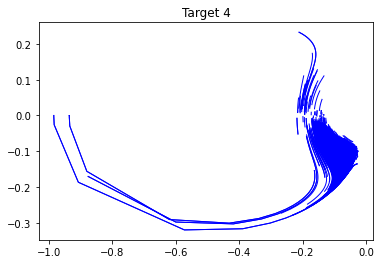

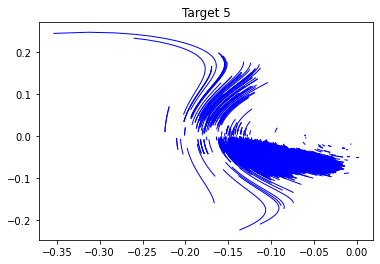

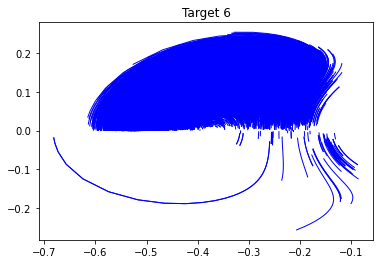

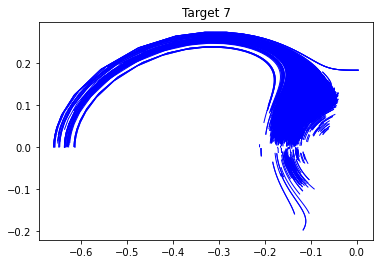

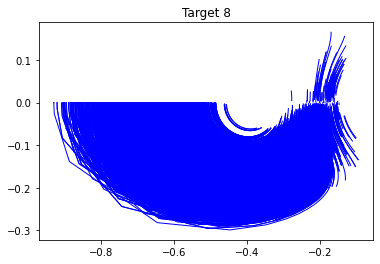

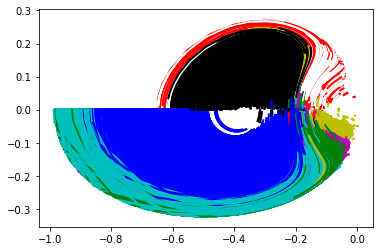

In [12]:
import warnings
warns = []
t = np.arange(64)
idx = 0
# fig1, ax1 = plt.subplots()
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()
fig5, ax5 = plt.subplots()
fig6, ax6 = plt.subplots()
fig7, ax7 = plt.subplots()
fig8, ax8 = plt.subplots()
fig, ax = plt.subplots()

trajectories_train = []
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
figs = [fig1,fig2,fig3,fig4,fig5,fig6,fig7,fig8]
for idx in range(0,train_set_results['z'].shape[0]-16):

    with warnings.catch_warnings(record=True) as w:
        # Cause all warnings to always be triggered.
        warnings.simplefilter("always")

        z_sim_train = sindy_simulate(train_set_results['z'][idx], t,
                                     params['coefficient_mask']*train_set_results['sindy_coefficients'],
                                     params['poly_order'], params['include_sine'])

        if not len(w):
#             if train_data_labels[idx] != 6 and train_data_labels[idx] != 8:
                axs[train_data_labels[idx]-1].plot(z_sim_train[:,0], z_sim_train[:,1], linewidth=1, c='b')
                ax.plot(z_sim_train[:,0], z_sim_train[:,1], linewidth=2, c=color_map[train_data_labels[idx]])
                trajectories_train.append(z_sim_train)
#             ax2.set_xlim(-1.5, 0.5)
#             ax2.set_ylim(-1.5, 0.5)
        else:
#             print("WARNING!")
            warns.append(idx)
# ax2.colorbar()
print(len(warns))
for i in range(8):
    axs[i].set_title("Target "+str(i+1))

0


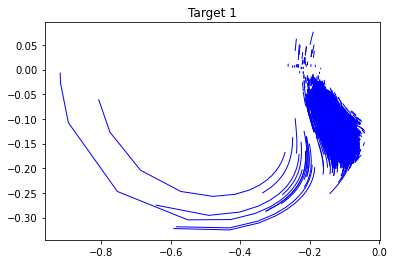

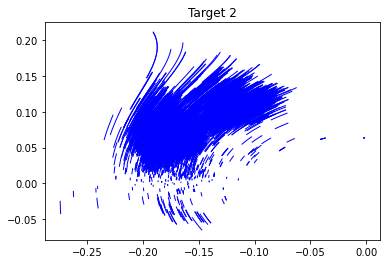

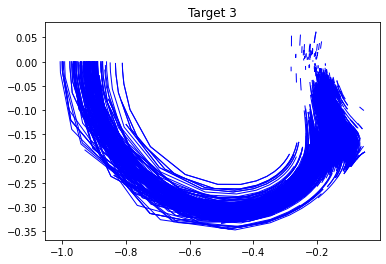

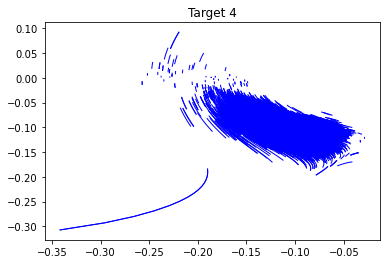

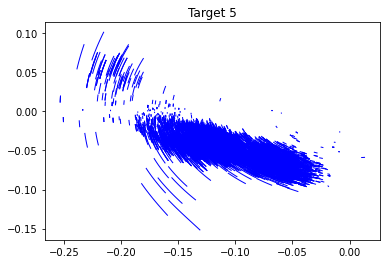

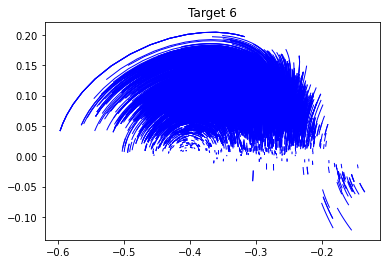

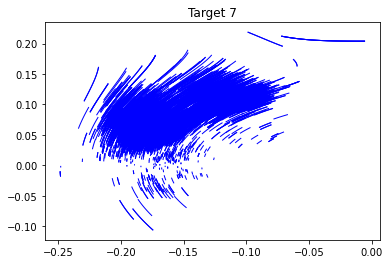

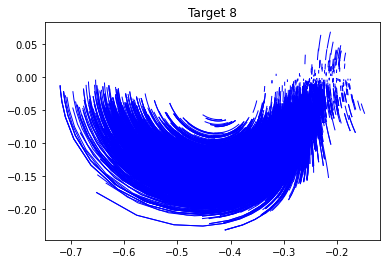

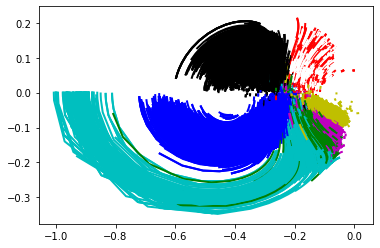

In [10]:
import warnings
warns = []
t = np.arange(16)
idx = 0
# fig1, ax1 = plt.subplots()
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()
fig5, ax5 = plt.subplots()
fig6, ax6 = plt.subplots()
fig7, ax7 = plt.subplots()
fig8, ax8 = plt.subplots()
fig, ax = plt.subplots()

trajectories_train = []
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
figs = [fig1,fig2,fig3,fig4,fig5,fig6,fig7,fig8]
for idx in range(0,train_set_results['z'].shape[0]-16):

    with warnings.catch_warnings(record=True) as w:
        # Cause all warnings to always be triggered.
        warnings.simplefilter("always")

        z_sim_train = sindy_simulate(train_set_results['z'][idx], t,
                                     params['coefficient_mask']*train_set_results['sindy_coefficients'],
                                     params['poly_order'], params['include_sine'])

        if not len(w):
#             if train_data_labels[idx] != 6 and train_data_labels[idx] != 8:
                axs[train_data_labels[idx]-1].plot(z_sim_train[:,0], z_sim_train[:,1], linewidth=1, c='b')
                ax.plot(z_sim_train[:,0], z_sim_train[:,1], linewidth=2, c=color_map[train_data_labels[idx]])
                trajectories_train.append(z_sim_train)
#             ax2.set_xlim(-1.5, 0.5)
#             ax2.set_ylim(-1.5, 0.5)
        else:
#             print("WARNING!")
            warns.append(idx)
# ax2.colorbar()
print(len(warns))
for i in range(8):
    axs[i].set_title("Target "+str(i+1))

0


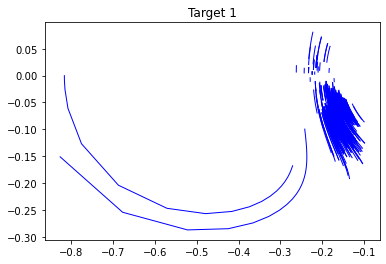

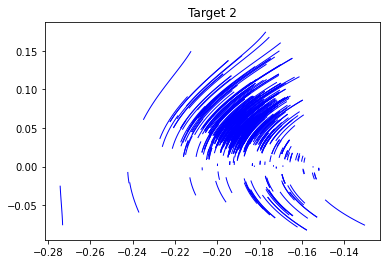

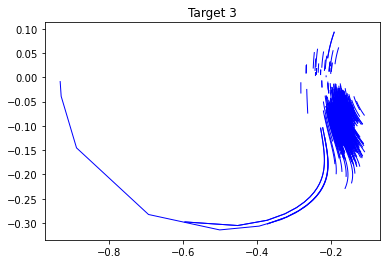

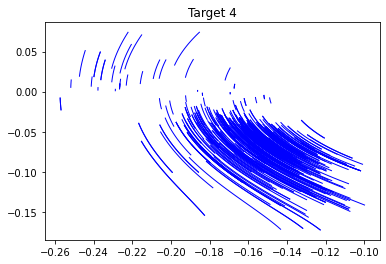

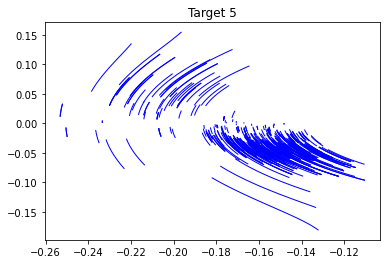

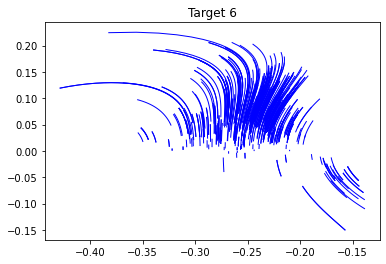

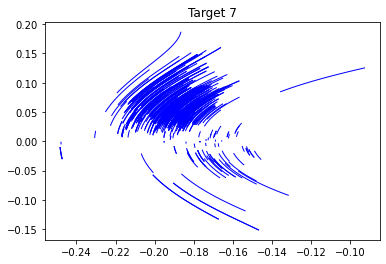

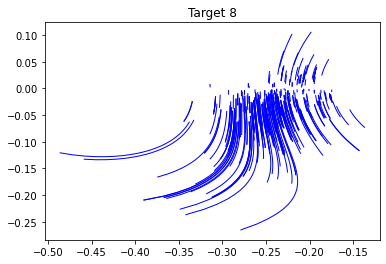

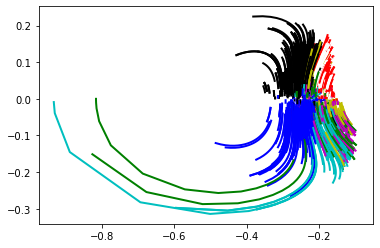

In [12]:
import warnings
warns = []
t = np.arange(32)
idx = 0
# fig1, ax1 = plt.subplots()
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()
fig5, ax5 = plt.subplots()
fig6, ax6 = plt.subplots()
fig7, ax7 = plt.subplots()
fig8, ax8 = plt.subplots()
fig, ax = plt.subplots()

trajectories_train = []
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
figs = [fig1,fig2,fig3,fig4,fig5,fig6,fig7,fig8]
for idx in range(0,train_set_results['z'].shape[0]-16,16):

    with warnings.catch_warnings(record=True) as w:
        # Cause all warnings to always be triggered.
        warnings.simplefilter("always")

        z_sim_train = sindy_simulate(train_set_results['z'][idx], t,
                                     params['coefficient_mask']*train_set_results['sindy_coefficients'],
                                     params['poly_order'], params['include_sine'])

        if not len(w):
#             if train_data_labels[idx] != 6 and train_data_labels[idx] != 8:
                axs[train_data_labels[idx]-1].plot(z_sim_train[:,0], z_sim_train[:,1], linewidth=1, c='b')
                ax.plot(z_sim_train[:,0], z_sim_train[:,1], linewidth=2, c=color_map[train_data_labels[idx]])
                trajectories_train.append(z_sim_train)
#             ax2.set_xlim(-1.5, 0.5)
#             ax2.set_ylim(-1.5, 0.5)
        else:
#             print("WARNING!")
            warns.append(idx)
# ax2.colorbar()
print(len(warns))
for i in range(8):
    axs[i].set_title("Target "+str(i+1))

In [23]:
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

# Trajectories 3D

0


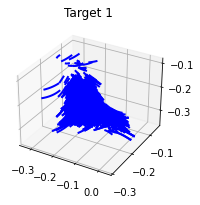

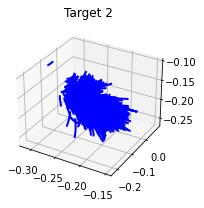

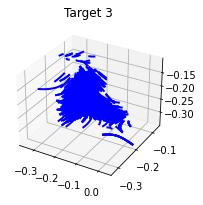

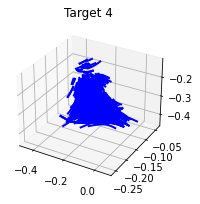

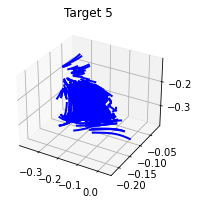

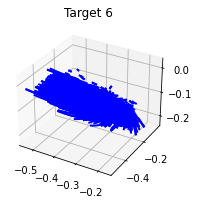

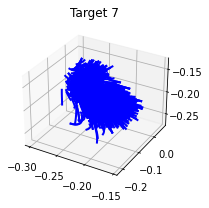

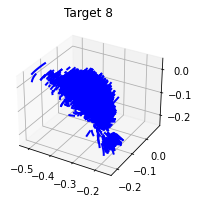

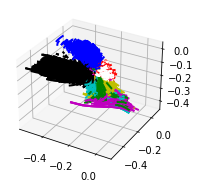

In [11]:
import warnings
warns = []
t = np.arange(16)
idx = 0
fig1 = plt.figure(figsize=(3,3))
ax1 = fig1.add_subplot(111, projection='3d')
fig2 = plt.figure(figsize=(3,3))
ax2 = fig2.add_subplot(111, projection='3d')
fig3 = plt.figure(figsize=(3,3))
ax3 = fig3.add_subplot(111, projection='3d')
fig4 = plt.figure(figsize=(3,3))
ax4 = fig4.add_subplot(111, projection='3d')
fig5 = plt.figure(figsize=(3,3))
ax5 = fig5.add_subplot(111, projection='3d')
fig6 = plt.figure(figsize=(3,3))
ax6 = fig6.add_subplot(111, projection='3d')
fig7 = plt.figure(figsize=(3,3))
ax7 = fig7.add_subplot(111, projection='3d')
fig8 = plt.figure(figsize=(3,3))
ax8 = fig8.add_subplot(111, projection='3d')
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111, projection='3d')

trajectories_train = []
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
figs = [fig1,fig2,fig3,fig4,fig5,fig6,fig7,fig8]
for idx in range(0,train_set_results['z'].shape[0]-16):

    with warnings.catch_warnings(record=True) as w:
        # Cause all warnings to always be triggered.
        warnings.simplefilter("always")

        z_sim_train = sindy_simulate(train_set_results['z'][idx], t,
                                     params['coefficient_mask']*train_set_results['sindy_coefficients'],
                                     params['poly_order'], params['include_sine'])

        if not len(w):
#             if train_data_labels[idx] != 6 and train_data_labels[idx] != 8:# and train_data_labels[idx] != 2:
#                 print(train_data_labels[idx])
                axs[train_data_labels[idx]-1].plot(z_sim_train[:,0], z_sim_train[:,1], z_sim_train[:,2], linewidth=2, c='b')
                ax.plot(z_sim_train[:,0], z_sim_train[:,1], z_sim_train[:,2], linewidth=2, c=color_map[train_data_labels[idx]])
                trajectories_train.append(z_sim_train)
#             ax.set_xlim(-0.5, 0.1)
#             ax.set_ylim(-0.5, 0.1)
#             ax.set_zlim(-0.5, 0.1)
        else:
#             print("WARNING!")
            warns.append(idx)
# ax2.colorbar()
print(len(warns))
for i in range(8):
    axs[i].set_title("Target "+str(i+1))

# Test dataset target trajectories 2D

0


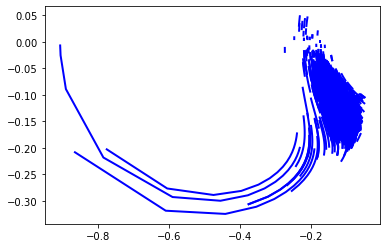

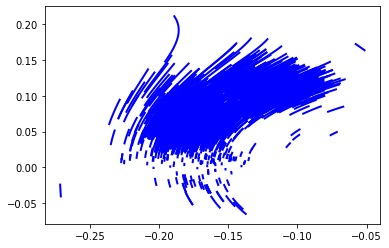

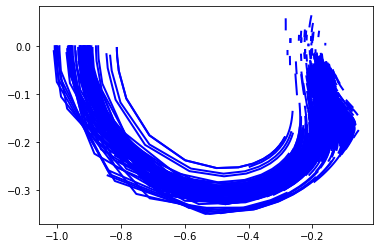

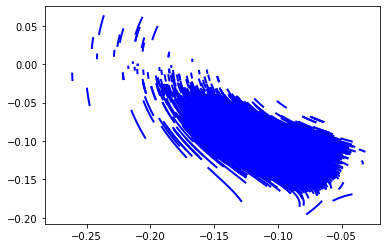

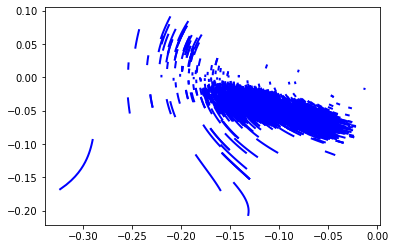

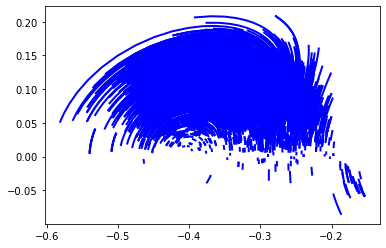

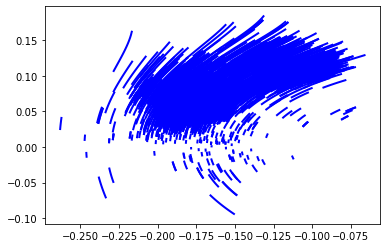

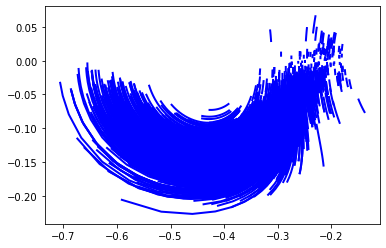

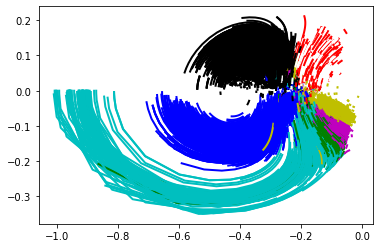

In [9]:
import warnings
warns = []
t = np.arange(16)
idx = 0
# fig1, ax1 = plt.subplots()
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()
fig5, ax5 = plt.subplots()
fig6, ax6 = plt.subplots()
fig7, ax7 = plt.subplots()
fig8, ax8 = plt.subplots()
fig, ax = plt.subplots()

trajectories_test = []
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
for idx in range(0,test_set_results['z'].shape[0]-16):
# for idx in range(1600):

#     z_sim_test = sindy_simulate(test_set_results['z'][idx], t, 
#                                 params['coefficient_mask']*test_set_results['sindy_coefficients'],
#                                 params['poly_order'], params['include_sine'])


#     ax1.plot(z_sim_test[:,0], z_sim_test[:,1], linewidth=2)

    with warnings.catch_warnings(record=True) as w:
        # Cause all warnings to always be triggered.
        warnings.simplefilter("always")

        z_sim_test = sindy_simulate(test_set_results['z'][idx], t,
                                     params['coefficient_mask']*test_set_results['sindy_coefficients'],
                                     params['poly_order'], params['include_sine'])

        if not len(w):
            axs[test_data_labels[idx]-1].plot(z_sim_test[:,0], z_sim_test[:,1], linewidth=2, c='b')
            ax.plot(z_sim_test[:,0], z_sim_test[:,1], linewidth=2, c=color_map[test_data_labels[idx]])
            trajectories_test.append(z_sim_test)
#             ax2.set_xlim(-1.5, 0.5)
#             ax2.set_ylim(-1.5, 0.5)
        else:
#             print("WARNING!")
            warns.append(idx)
# ax2.colorbar()
print(len(warns))

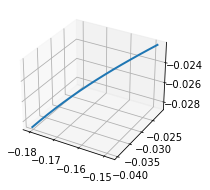

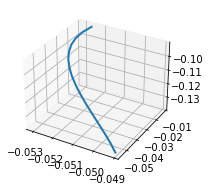

In [7]:
t = np.arange(16)
idx = 0
# for idx in range(16)
z_sim_test = sindy_simulate(test_set_results['z'][idx], t, 
                            params['coefficient_mask']*test_set_results['sindy_coefficients'],
                            params['poly_order'], params['include_sine'])

fig1 = plt.figure(figsize=(3,3))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot(z_sim_test[:,0], z_sim_test[:,1], z_sim_test[:,2], linewidth=2)
# # plt.axis('off')
# ax1.view_init(azim=120)

# plt.figure(figsize=(3,3))
# plt.plot(z_sim_test[:,0], z_sim_test[:,1], linewidth=2)
# plt.axis('equal')
# plt.axis('off')
# plt.xticks([])
# plt.yticks([])


# t = np.arange(1000)
z_sim_train = sindy_simulate(train_set_results['z'][idx], t,
                             params['coefficient_mask']*train_set_results['sindy_coefficients'],
                             params['poly_order'], params['include_sine'])

fig1 = plt.figure(figsize=(3,3))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot(z_sim_train[:,0], z_sim_train[:,1], z_sim_train[:,2], linewidth=2)
# # plt.axis('off')
# ax1.view_init(azim=120)

# plt.figure(figsize=(3,3))
# plt.plot(z_sim_train[:,0], z_sim_train[:,1], linewidth=2)
# plt.axis('equal')
# plt.axis('off')
# plt.xticks([])
# plt.yticks([])



In [11]:
z_sim_train.shape
# train_set_results['z'].shape
# np.unique(train_data_labels)

(16, 2)

In [12]:
train_set_results['z'].shape
# test_set_results['z'].shape


(53760, 2)

In [23]:
test_set_results['sindy_coefficients']

array([[ 1.58274182e-04,  1.13940354e-04],
       [ 1.35660931e-01,  7.96097741e-02],
       [ 2.81581451e-05,  1.68930885e-04],
       [ 1.27146557e-01, -2.45351752e-04],
       [ 3.46611887e-05,  1.60974488e-01],
       [ 1.93046377e-04, -5.14283001e-01],
       [-6.84889436e-01, -7.26009821e-05],
       [ 1.37425246e-04, -6.42246008e-01],
       [-1.13806300e-01, -1.68198050e-04],
       [ 1.71341613e-04, -1.45159531e+00],
       [-8.53455514e-02, -7.72057101e-02],
       [-1.30407898e-05, -7.88122707e-05]], dtype=float32)

IndexError: index 2 is out of bounds for axis 1 with size 2

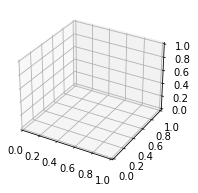

In [13]:
fig1 = plt.figure(figsize=(3,3))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot(test_set_results['z'][:,0], test_set_results['z'][:,1], test_set_results['z'][:,2], linewidth=2)
# plt.axis('off')
ax1.view_init(azim=120)

In [12]:
Xi_plot = (params['coefficient_mask']*test_set_results['sindy_coefficients'])
Xi_plot[Xi_plot==0] = np.inf
plt.figure(figsize=(1,2))
plt.imshow(Xi_plot, interpolation='none')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.clim([-10,30])

# Xi_transformed_plot = np.copy(sindy_coefficients_transformed)
# Xi_transformed_plot[Xi_transformed_plot==0] = np.inf
# plt.figure(figsize=(1,2))
# plt.imshow(Xi_transformed_plot, interpolation='none')
# plt.xticks([])
# plt.yticks([])
# plt.axis('off')
# plt.clim([-10,30])

# Xi_true_plot = np.copy(test_data['sindy_coefficients'])
# Xi_true_plot[Xi_true_plot==0] = np.inf
# Xi_true_plot[6,1] = -1.
# Xi_true_plot[5,2] = 1.
# plt.figure(figsize=(1,2))
# plt.imshow(Xi_true_plot, interpolation='none')
# plt.xticks([])
# plt.yticks([])
# plt.axis('off')
# plt.clim([-10,30])